### Load Datasets

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# loading the dataset
data = pd.read_csv("obesity dataset_csv.csv")

In [ ]:
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,2,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,5,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2108,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2109,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2110,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data.drop(["id"], axis =1, inplace = True)

In [ ]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
print(data['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


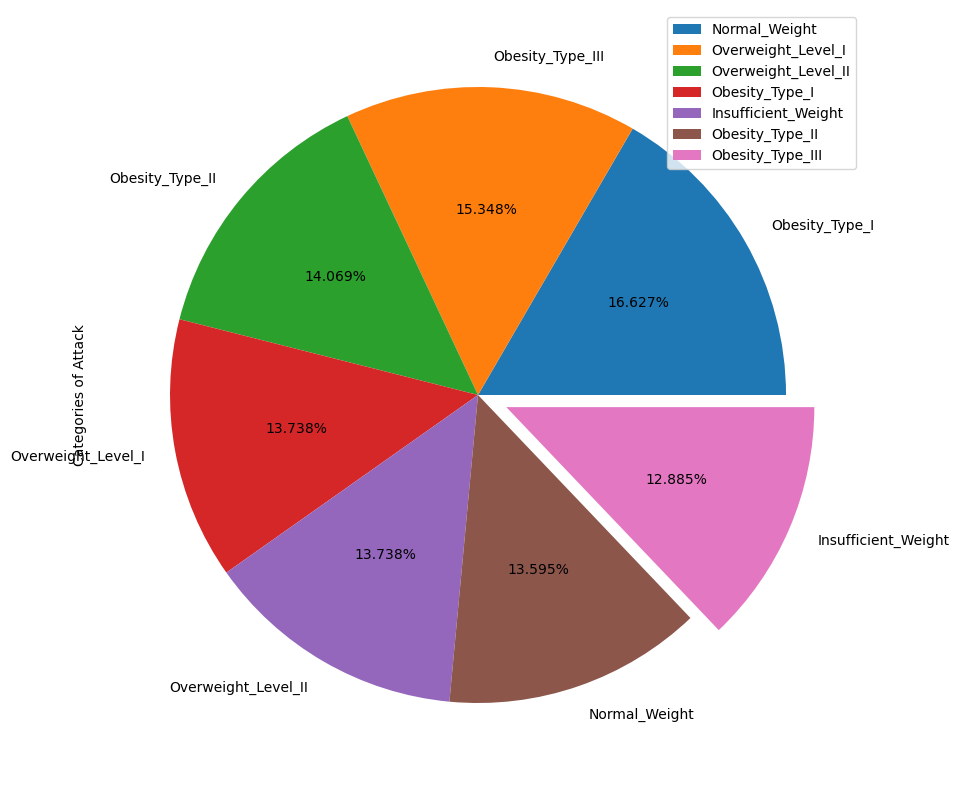

In [ ]:
# check the number of unique values in the target variable
data['NObeyesdad'].value_counts().plot(kind = 'pie',
                                               explode = [0, 0, 0, 0, 0,0,0.1],
                                               figsize = (10, 10),
                                               autopct = '%1.3f%%',
                                               shadow = False)
plt.ylabel("Categories of Attack")
plt.legend(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'])
plt.show()

In [ ]:
# check the data type of dataframe columns
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1:]
print(X)
print(y)
print(len(X))

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

## Label encode cate varibale on the features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ["Gender","family_history_with_overweight","FAVC","CAEC", "SMOKE","SCC","CALC","MTRANS"]

label_encoder = LabelEncoder()

for col in columns_to_encode:
    X[col] = label_encoder.fit_transform(data[col])


In [ ]:
# data.drop(columns_to_encode, axis = 1, inplace = True)
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


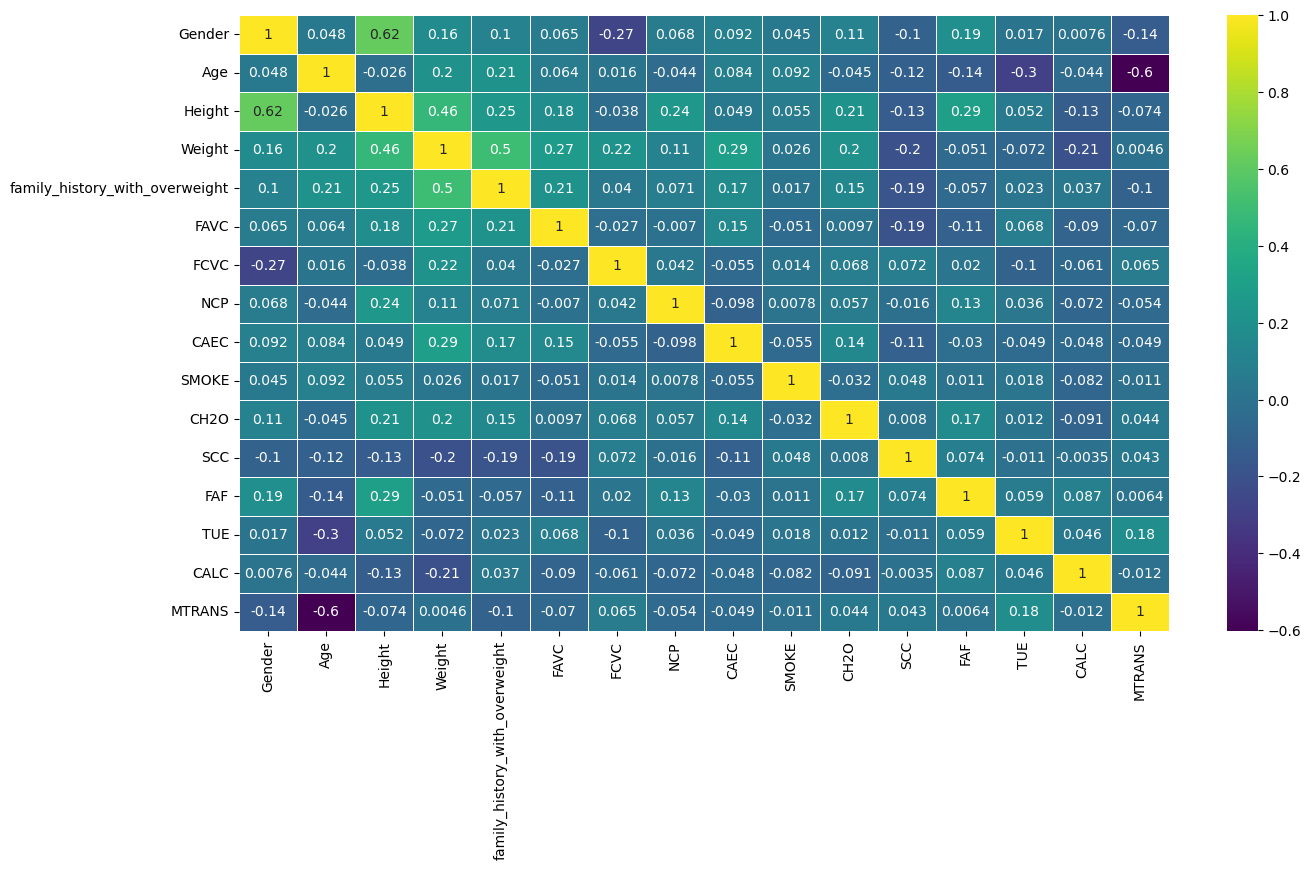

In [ ]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(15,8))  # Sample figsize in inches
sns.heatmap(X.corr(method='pearson'), annot=True, linewidths=.5, ax=ax, cmap='viridis');

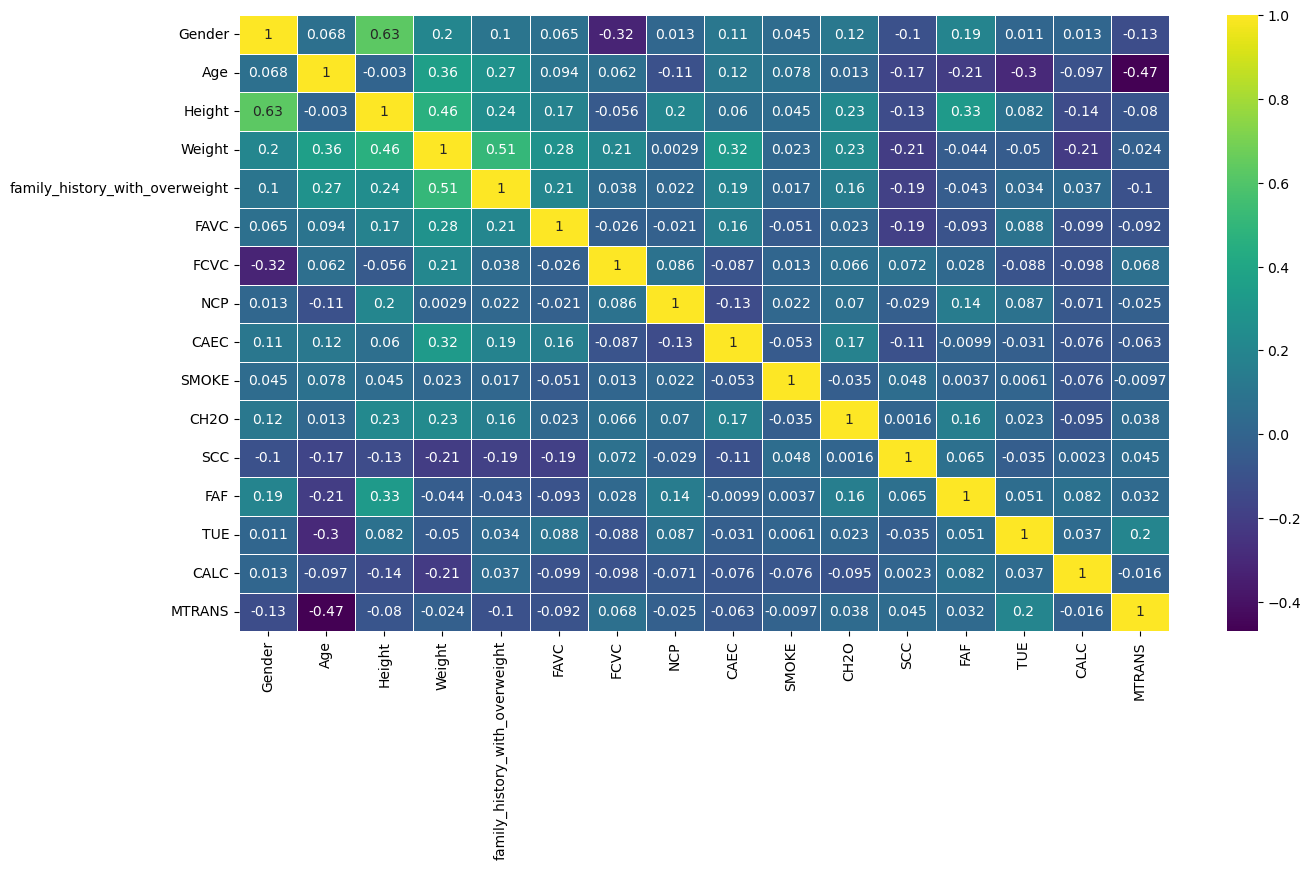

In [ ]:
# spearman's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(15,8))  # Sample figsize in inches
sns.heatmap(X.corr(method='spearman'), annot=True, linewidths=.5, ax=ax, cmap="viridis");

### Label Encode the target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Segmentation

In [ ]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, encoded_y, test_size=0.25,
                                                  random_state=0,
                                                  stratify=encoded_y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_train, sep='\n')
print('y Validation set', y_val, sep='\n')

X Training set
      Gender        Age    Height      Weight  family_history_with_overweight  \
1          0  21.000000  1.520000   56.000000                               1   
893        1  25.785925  1.818848   87.032398                               0   
1464       1  20.654752  1.780791  102.921218                               1   
1895       0  25.999185  1.568543  102.000122                               1   
1304       1  29.881301  1.758189  108.721893                               1   
...      ...        ...       ...         ...                             ...   
400        1  18.000000  1.650000   70.000000                               1   
2034       0  26.000000  1.641849  111.682693                               1   
576        0  19.504696  1.590317   42.367615                               0   
1208       0  45.821267  1.687326   80.413997                               1   
859        1  23.000000  1.690196   75.000000                               1   

      FAVC  

### Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[-0.99684641 -0.52789046 -1.95298058 ... -1.07542221 -0.5191479
   0.51421519]
 [ 1.00316356  0.20833461  1.28174631 ...  0.44861413  1.4099862
  -1.8361293 ]
 [ 1.00316356 -0.58100041  0.86981784 ... -1.07542221 -0.5191479
   0.51421519]
 ...
 [-0.99684641 -0.75791501 -1.19187028 ... -1.07542221 -0.5191479
   0.51421519]
 [-0.99684641  3.29039731 -0.14184611 ... -1.07542221  1.4099862
  -1.8361293 ]
 [ 1.00316356 -0.22022786 -0.11078127 ...  2.21416897 -0.5191479
   0.51421519]]
[[-0.99684641  0.24126604 -0.54450926 ... -0.86943623 -0.5191479
   0.51421519]
 [-0.99684641 -0.98938436 -0.762342   ...  2.21416897 -0.5191479
   0.51421519]
 [ 1.00316356 -0.52789046  0.14961139 ... -1.07542221 -0.5191479
   0.51421519]
 ...
 [-0.99684641  0.23055569 -0.97789088 ... -0.18875567 -0.5191479
   0.51421519]
 [ 1.00316356 -0.70341612 -0.87058187 ...  0.75066604 -0.5191479
   0.51421519]
 [-0.99684641 -0.21471624 -1.1020853  ... -1.07542221  1.4099862
   0.51421519]]
1583
528


### Train Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model

  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
    '''function to plot confusion matrix

    Args
    y_val: array. The validation set of the target variable.
    y_pred: array. Model's prediction.
    label: list. A list containing all the classes in the target variable

    Returns
    It returns a plot of the confusion matrix
    '''
    cm = confusion_matrix(y_val, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='')
    plt.xticks(rotation ="vertical")
    plt.show()

# class labels
label = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III']

### Logistic Regression

{'accuracy_score': 0.9034090909090909, 'precision_score': 0.9008952821626183, 'recall_score': 0.9021032240210322, 'f1_score': 0.9006244528275648}


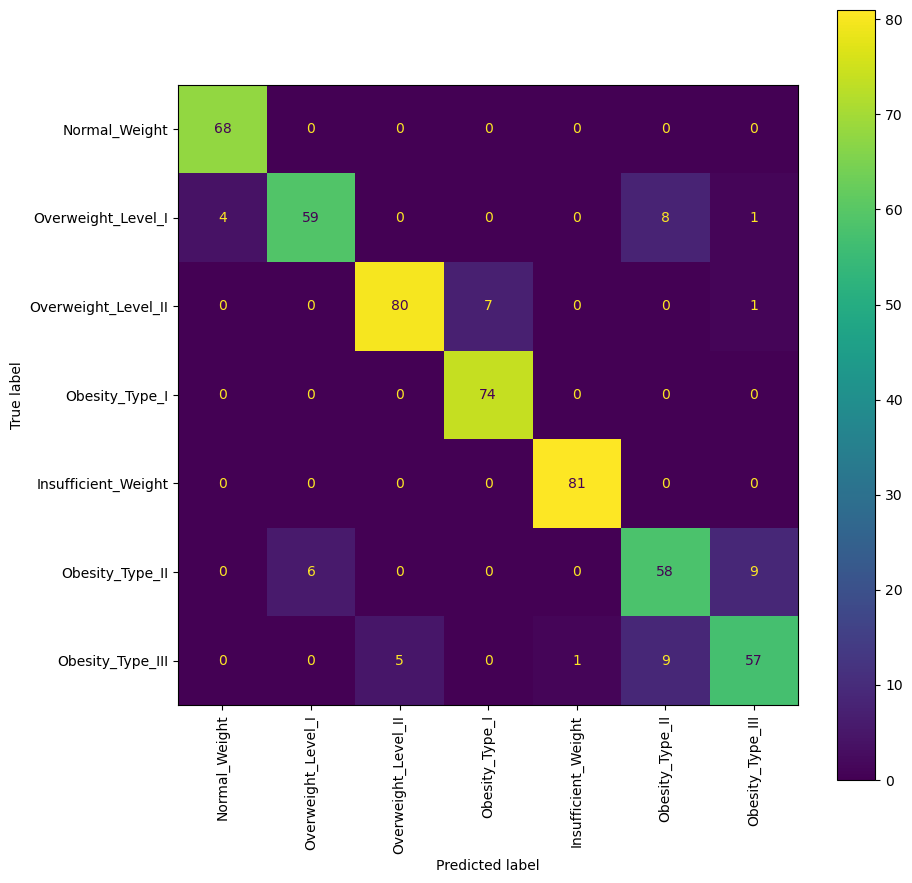

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        68
           1       0.91      0.82      0.86        72
           2       0.94      0.91      0.92        88
           3       0.91      1.00      0.95        74
           4       0.99      1.00      0.99        81
           5       0.77      0.79      0.78        73
           6       0.84      0.79      0.81        72

    accuracy                           0.90       528
   macro avg       0.90      0.90      0.90       528
weighted avg       0.90      0.90      0.90       528



In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000) # , solver='liblinear'
logistic_regression_model.fit(scaled_X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(scaled_X_val)
print(evaluate_model(y_val, logistic_regression_y_pred))
plot_confusion_matrix(y_val, logistic_regression_y_pred, label)
print(classification_report(y_val, logistic_regression_y_pred))

### Decision Tree Classifier

{'accuracy_score': 0.9621212121212122, 'precision_score': 0.962857668409538, 'recall_score': 0.9614717876200553, 'f1_score': 0.9618062322214126}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.96      0.93      0.94        72
           2       0.96      0.97      0.96        88
           3       0.96      0.97      0.97        74
           4       1.00      1.00      1.00        81
           5       0.90      0.96      0.93        73
           6       0.99      0.92      0.95        72

    accuracy                           0.96       528
   macro avg       0.96      0.96      0.96       528
weighted avg       0.96      0.96      0.96       528



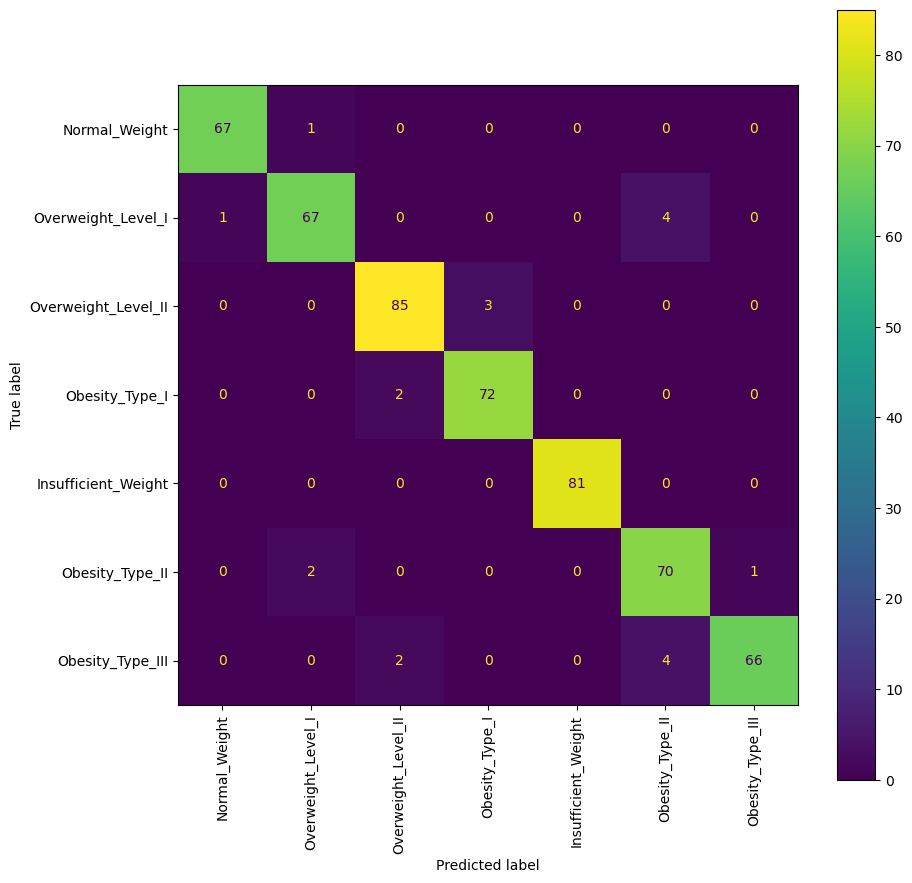

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy")
decision_tree_model.fit(scaled_X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(scaled_X_val)

print(evaluate_model(y_val, decision_tree_y_pred))
print(classification_report(y_val, decision_tree_y_pred))
plot_confusion_matrix(y_val, decision_tree_y_pred, label)

### Random Forest Classifier

{'accuracy_score': 0.9678030303030303, 'precision_score': 0.9677174612389362, 'recall_score': 0.967732028469337, 'f1_score': 0.9674418511983831}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.88      0.94      0.91        72
           2       1.00      0.95      0.98        88
           3       0.97      1.00      0.99        74
           4       1.00      1.00      1.00        81
           5       0.93      0.93      0.93        73
           6       0.99      0.96      0.97        72

    accuracy                           0.97       528
   macro avg       0.97      0.97      0.97       528
weighted avg       0.97      0.97      0.97       528



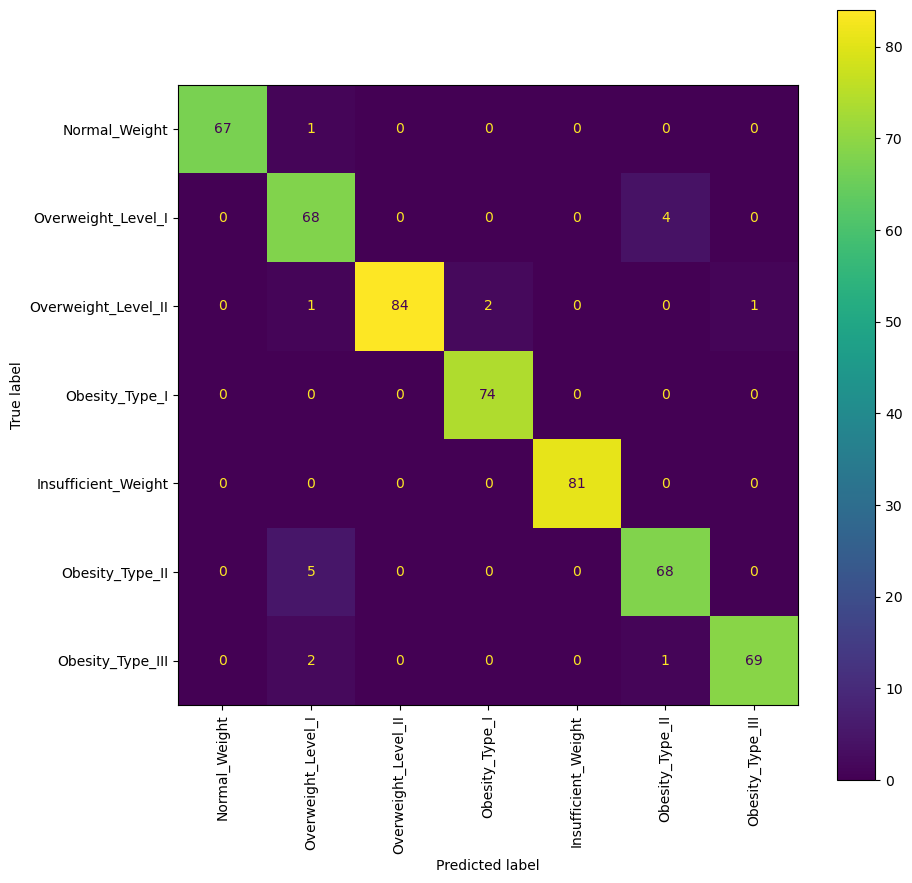

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200,
                                             criterion="entropy")
random_forest_model.fit(scaled_X_train, y_train)
random_forest_y_pred = random_forest_model.predict(scaled_X_val)

print(evaluate_model(y_val, random_forest_y_pred))
print(classification_report(y_val, random_forest_y_pred))
plot_confusion_matrix(y_val, random_forest_y_pred, label)

**RANKING THE TRAINED MODELS ON THE MAE VALUE**

In [ ]:
from sklearn.metrics import accuracy_score

model_preds = [logistic_regression_y_pred, decision_tree_y_pred, random_forest_y_pred]
model_names = ['Logistic regression', 'Decision Tree', 'Random Forest']

# Function for comparing different models
def score_model(model_preds, y_val):
    return accuracy_score(y_val, model_preds)

# Calculate Accuracy for each model
acc_score = []
for i in range(len(model_names)):
    acc = score_model(model_preds[i], y_val)
    acc_score.append((model_names[i], acc))

acc_scores_sorted = sorted(acc_score, key=lambda x: x[1])
target_range = y_val.max() - y_val.min()

print("Done!")

Done!


In [ ]:
# Calculate Accuracy for each model
acc_score = []
for i in range(len(model_names)):
    acc = score_model(model_preds[i], y_val)
    acc_score.append((model_names[i], acc))

acc_scores_sorted = sorted(acc_score, key=lambda x: x[1])
target_range = y_val.max() - y_val.min()

# Print ranked model names, Accuracy scores, and Accuracy percentages
for i, (model_name, acc) in enumerate(acc_scores_sorted):
    error_percent = acc *100 # Calculate error percentage
    print(" %d: %s - ACC: %.4f - Accuracy: %.2f%%" % (i+1, model_name, acc, error_percent))

 1: Logistic regression - ACC: 0.9034 - Accuracy: 90.34%
 2: Decision Tree - ACC: 0.9621 - Accuracy: 96.21%
 3: Random Forest - ACC: 0.9678 - Accuracy: 96.78%


- **OVERALL RANKING:**
- 1: Random Forest - ACC: 0.9678 - Accuracy: 96.78%
- 2: Decision Tree - ACC: 0.9621 - Accuracy: 96.21%
- 2: Logistic regression - ACC: 0.9034 - Accuracy: 90.34%






# **EXPLAINABILITY**

> Add blockquote

> Add blockquote





# FEATURE IMPORTANCES


**DECISION TREE**

Feature ranking:
1. feature 3 (0.626432) - Weight
2. feature 2 (0.185349) - Height
3. feature 0 (0.118757) - Gender
4. feature 1 (0.018477) - Age
5. feature 10 (0.012115) - CH2O
6. feature 5 (0.011278) - FAVC
7. feature 12 (0.007894) - FAF
8. feature 7 (0.006328) - NCP
9. feature 6 (0.004232) - FCVC
10. feature 8 (0.003426) - CAEC
11. feature 13 (0.003198) - TUE
12. feature 15 (0.001613) - MTRANS
13. feature 9 (0.000902) - SMOKE
14. feature 14 (0.000000) - CALC
15. feature 11 (0.000000) - SCC
16. feature 4 (0.000000) - family_history_with_overweight


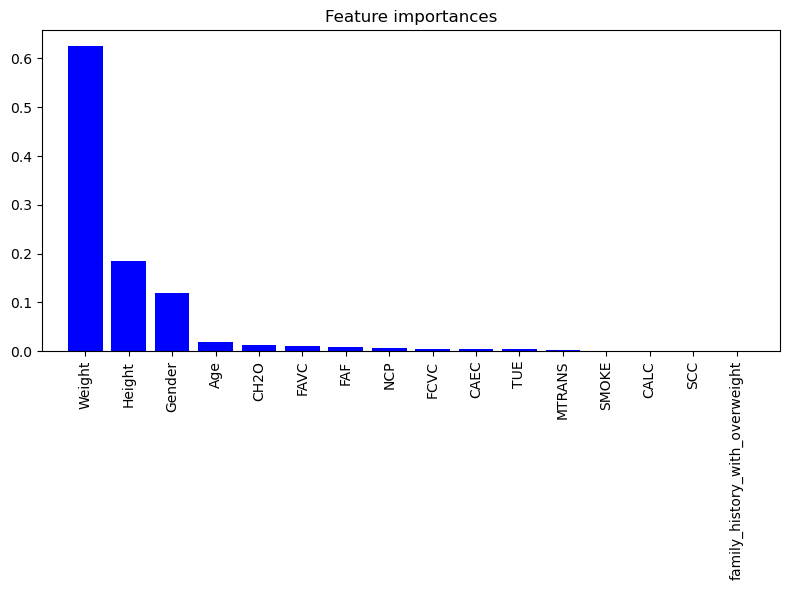

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, X):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        raise ValueError("Model does not have attribute 'feature_importances_' or 'coef_'.")

    # Get feature names
    feature_names = X.columns.tolist()

    # Sort indices based on importances
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="b", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()
plot_feature_importances(decision_tree_model, X)

**LOGISTIC REGRESSION**

Feature ranking:
1. feature 3 (11.972134) - Weight
2. feature 2 (3.091001) - Height
3. feature 1 (0.687652) - Age
4. feature 4 (0.561883) - family_history_with_overweight
5. feature 8 (0.302759) - CAEC
6. feature 12 (0.297907) - FAF
7. feature 5 (0.229369) - FAVC
8. feature 9 (0.151449) - SMOKE
9. feature 15 (0.116732) - MTRANS
10. feature 14 (0.101135) - CALC
11. feature 0 (0.100808) - Gender
12. feature 6 (0.088875) - FCVC
13. feature 13 (0.080318) - TUE
14. feature 7 (0.032585) - NCP
15. feature 10 (0.014261) - CH2O
16. feature 11 (0.010137) - SCC


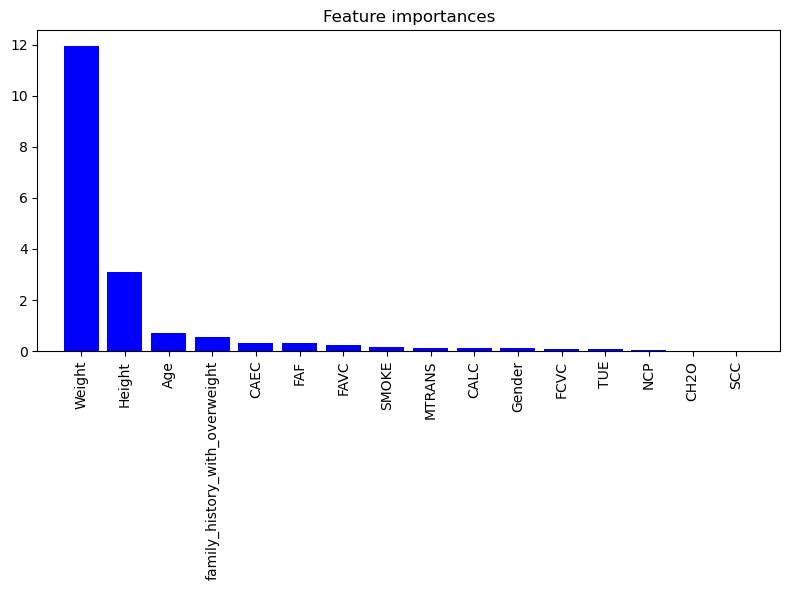

In [ ]:
plot_feature_importances(logistic_regression_model, X)

**RANDOM FOREST**

Feature ranking:
1. feature 3 (0.385502) - Weight
2. feature 6 (0.092967) - FCVC
3. feature 2 (0.088084) - Height
4. feature 1 (0.086933) - Age
5. feature 0 (0.067636) - Gender
6. feature 7 (0.048301) - NCP
7. feature 13 (0.038475) - TUE
8. feature 4 (0.035422) - family_history_with_overweight
9. feature 12 (0.033477) - FAF
10. feature 10 (0.033227) - CH2O
11. feature 8 (0.029461) - CAEC
12. feature 14 (0.026396) - CALC
13. feature 15 (0.014543) - MTRANS
14. feature 5 (0.014361) - FAVC
15. feature 11 (0.003890) - SCC
16. feature 9 (0.001325) - SMOKE


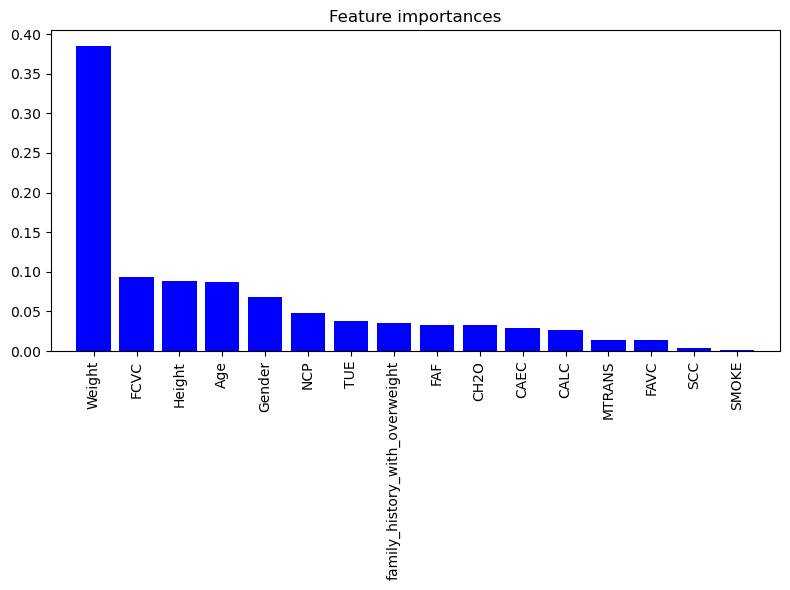

In [ ]:
plot_feature_importances(random_forest_model, X)

### Artificial Neural Network

In [ ]:
from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils
encoded_y_train = to_categorical(y_train)
encoded_y_val = to_categorical(y_val)
encoded_y_train

2024-03-10 13:07:19.262602: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

the input layer/first layer is the number of features in the dataset which is 18, second layer is 12, third is 8 and output is 4

In [ ]:
import tensorflow as tf
print(tf.__version__)

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=24, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=7, activation='softmax'))

ann_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history_ann = ann_model.fit(scaled_X_train, encoded_y_train, validation_split=0.20, batch_size=32, epochs=100)

2.14.0
Epoch 1/100
40/40 [==============================] - 1s 14ms/step - loss: 1.9869 - accuracy: 0.2006 - precision: 0.0625 - recall: 7.8989e-04 - val_loss: 1.8000 - val_accuracy: 0.3123 - val_precision: 0.3333 - val_recall: 0.0032
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 1.7535 - accuracy: 0.3910 - precision: 0.1111 - recall: 7.8989e-04 - val_loss: 1.6143 - val_accuracy: 0.4984 - val_precision: 1.0000 - val_recall: 0.0063
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.5834 - accuracy: 0.4629 - precision: 0.7500 - recall: 0.0166 - val_loss: 1.4497 - val_accuracy: 0.5237 - val_precision: 0.9697 - val_recall: 0.1009
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4266 - accuracy: 0.4984 - precision: 0.9310 - recall: 0.1493 - val_loss: 1.3028 - val_accuracy: 0.5647 - val_precision: 0.9403 - val_recall: 0.1987
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2874 - accuracy: 

In [ ]:
ann_y_pred = ann_model.predict(scaled_X_val)
ann_y_pred = (ann_y_pred > 0.5)
ann_y_pred

17/17 [==============================] - 0s 2ms/step


array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False, False]])

In [ ]:

# Check the test accuracy, precision, and recall
_, accuracy, precision, recall = ann_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.1757 - accuracy: 0.9432 - precision: 0.9429 - recall: 0.9375
Accuracy: 94.32


In [ ]:
# FUntion to plot the model training history
def history(history, name, train, val):
  # Access the training history to get loss values
  training_loss = history.history[train]
  validation_loss = history.history[val]

  # Create a range of epochs for the x-axis
  epochs = range(1, len(training_loss) + 1)

  # Plot training and validation loss
  plt.plot(epochs, training_loss, label= f'Training {train}', color='blue', marker='o')
  plt.plot(epochs, validation_loss, label= f'Validation {val}', color='red', marker='o')

  plt.title(f'Training and Validation Loss{name}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

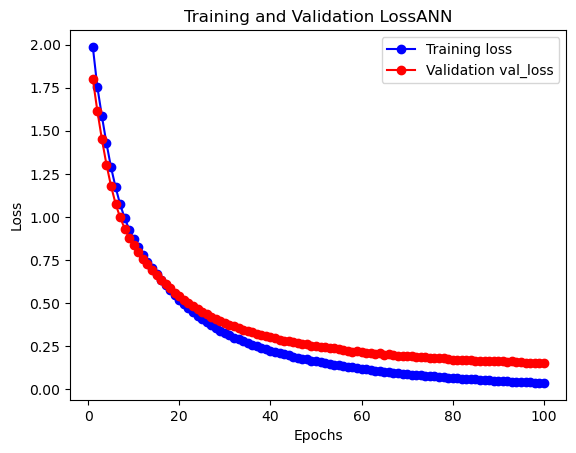

In [ ]:
history(history_ann, "ANN", "loss", "val_loss")

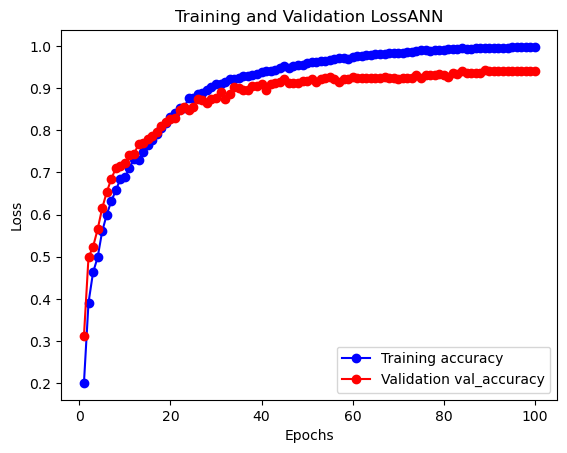

In [ ]:
# Plot graph between training and validation accuracy
history(history_ann, "ANN", "accuracy", "val_accuracy")

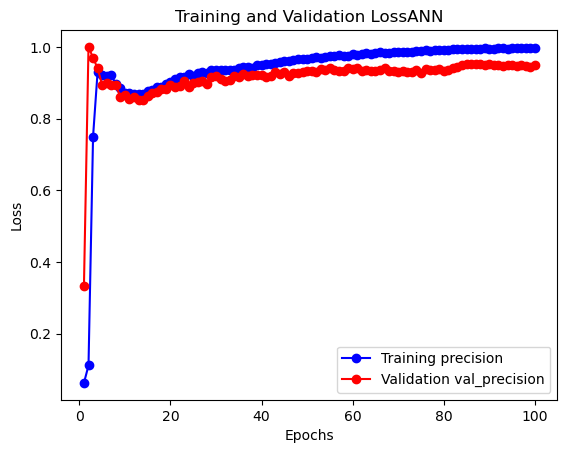

In [ ]:
# Plot graph between training and validation precision

history(history_ann, "ANN", "precision", "val_precision")

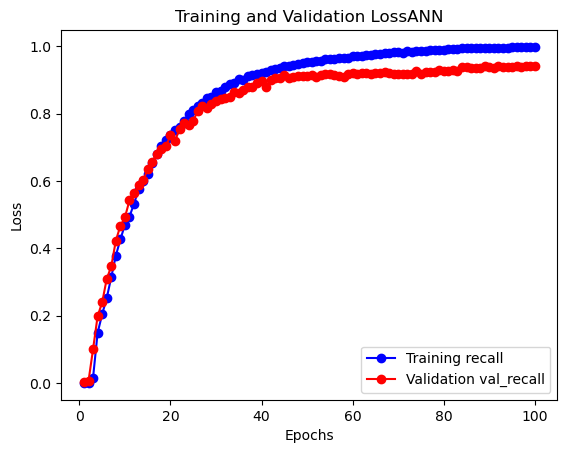

In [ ]:
# Plot graph between training and validation recall

history(history_ann, "ANN", "recall", "val_recall")

In [ ]:
confusion_matrix(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)), label

(array([[66,  2,  0,  0,  0,  0,  0],
        [ 4, 60,  0,  0,  0,  8,  0],
        [ 0,  0, 85,  2,  0,  0,  1],
        [ 0,  0,  1, 73,  0,  0,  0],
        [ 0,  0,  0,  0, 81,  0,  0],
        [ 0,  4,  1,  0,  0, 67,  1],
        [ 3,  0,  2,  0,  0,  4, 63]]),
 ['Normal_Weight',
  'Overweight_Level_I',
  'Overweight_Level_II',
  'Obesity_Type_I',
  'Insufficient_Weight',
  'Obesity_Type_II',
  'Obesity_Type_III'])

{'accuracy_score': 0.9375, 'precision_score': 0.9425242285871743, 'recall_score': 0.935589337885873, 'f1_score': 0.9382416689000644}
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.91      0.83      0.87        72
           2       0.96      0.97      0.96        88
           3       0.97      0.99      0.98        74
           4       1.00      1.00      1.00        81
           5       0.85      0.92      0.88        73
           6       0.97      0.88      0.92        72

   micro avg       0.94      0.94      0.94       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.94      0.94      0.94       528
 samples avg       0.94      0.94      0.94       528



/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


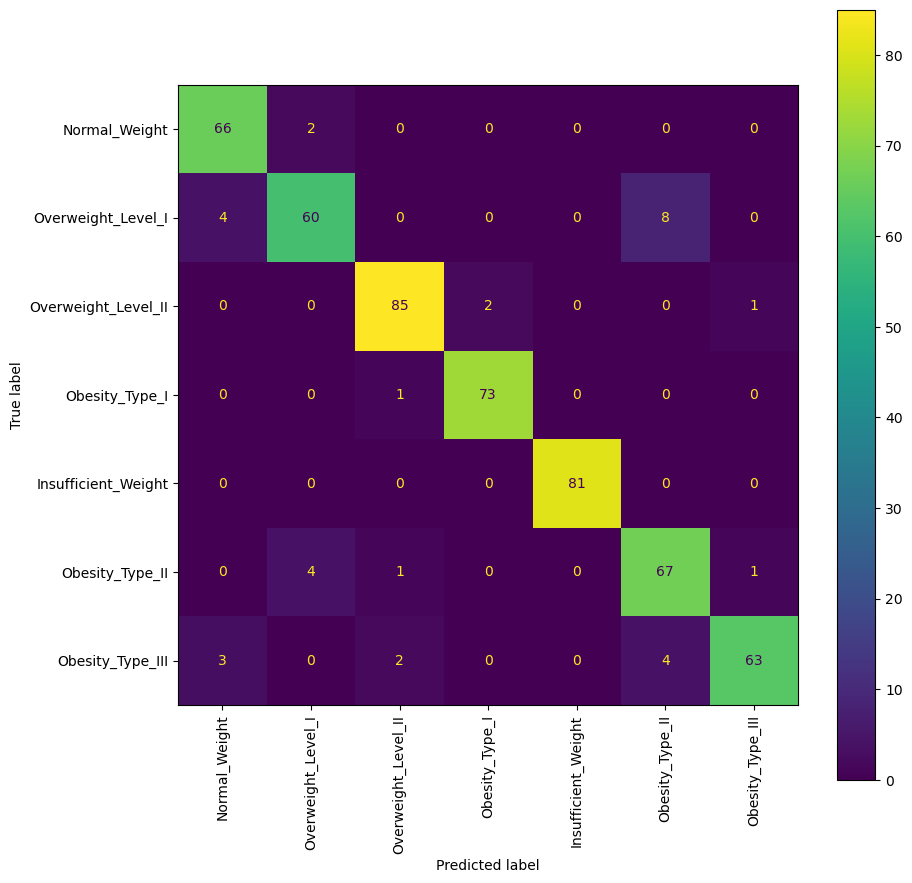

In [ ]:
print(evaluate_model(encoded_y_val, ann_y_pred))
print(classification_report(encoded_y_val, ann_y_pred))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1), label)

# implementing the cnn model

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dropout

# Normalize input data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape(target_shape=(scaled_X_train.shape[1], 1), input_shape=(scaled_X_train.shape[1],)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),  # Add dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Add dropout
    tf.keras.layers.Dense(7, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Use early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_history = cnn_model.fit(scaled_X_train, encoded_y_train, validation_split= .20, batch_size=32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
40/40 [==============================] - 2s 12ms/step - loss: 1.7704 - accuracy: 0.2978 - precision_1: 0.2143 - recall_1: 0.0024 - val_loss: 1.5091 - val_accuracy: 0.5804 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4045 - accuracy: 0.5118 - precision_1: 0.7047 - recall_1: 0.1074 - val_loss: 1.1431 - val_accuracy: 0.5868 - val_precision_1: 0.7674 - val_recall_1: 0.3123
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 1.1608 - accuracy: 0.5735 - precision_1: 0.7664 - recall_1: 0.3239 - val_loss: 0.9501 - val_accuracy: 0.6877 - val_precision_1: 0.8434 - val_recall_1: 0.4416
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 1.0526 - accuracy: 0.6161 - precision_1: 0.7493 - recall_1: 0.3965 - val_loss: 0.8480 - val_accuracy: 0.7098 - val_precision_1: 0.8254 - val_recall_1: 0.4921
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - 

In [ ]:
cnn_y_pred = cnn_model.predict(scaled_X_val)
cnn_y_pred = (cnn_y_pred > 0.5)
cnn_y_pred

17/17 [==============================] - 0s 2ms/step


array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False, False]])

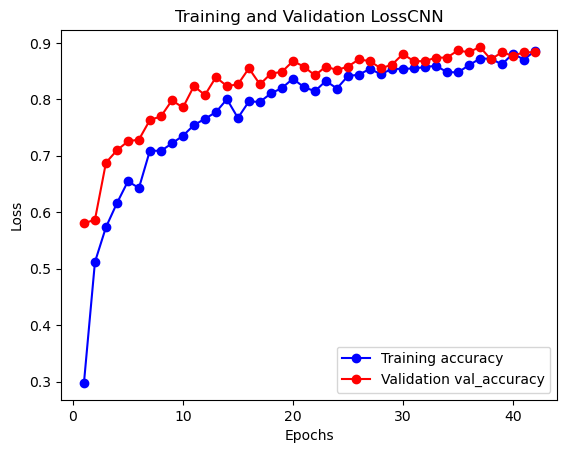

In [ ]:
history(cnn_history, "CNN", "accuracy", "val_accuracy")

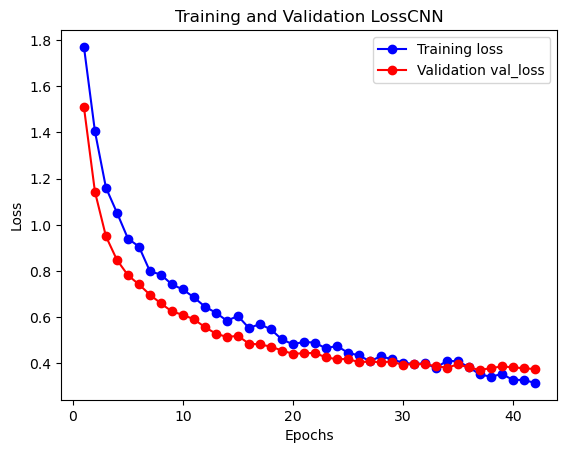

In [ ]:
history(cnn_history, "CNN", "loss", "val_loss")

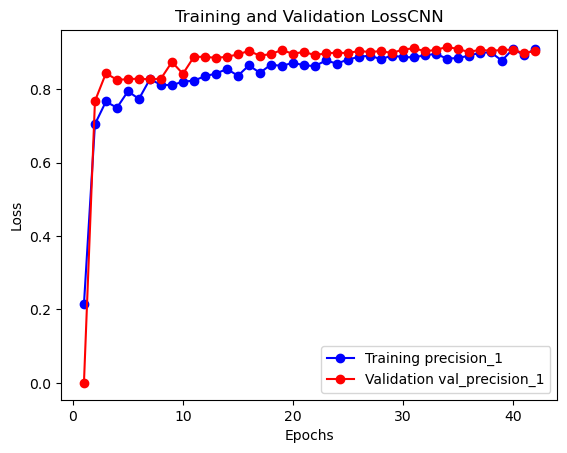

In [ ]:

history(cnn_history, "CNN", "precision_1", "val_precision_1")

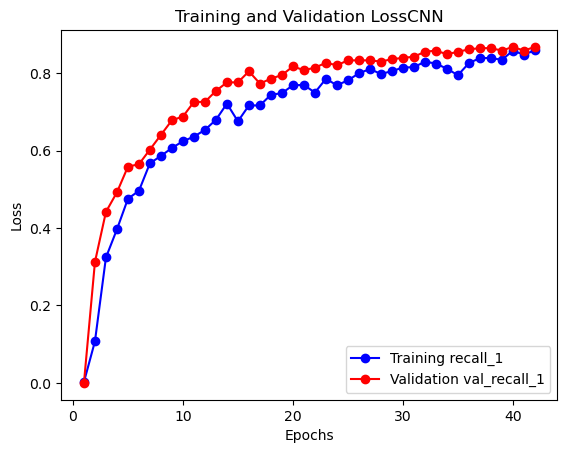

In [ ]:

history(cnn_history, "CNN", "recall_1", "val_recall_1")

In [ ]:
# Check the validation accuracy
_, accuracy, precision, recall = cnn_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.9015 - precision_1: 0.9240 - recall_1: 0.8750
Accuracy: 90.15


In [ ]:
confusion_matrix(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1)), label

(array([[66,  2,  0,  0,  0,  0,  0],
        [13, 49,  0,  0,  0, 10,  0],
        [ 0,  0, 85,  2,  0,  0,  1],
        [ 0,  0,  1, 73,  0,  0,  0],
        [ 0,  0,  0,  0, 81,  0,  0],
        [ 9,  5,  2,  0,  0, 57,  0],
        [ 5,  2,  5,  0,  0,  4, 56]]),
 ['Normal_Weight',
  'Overweight_Level_I',
  'Overweight_Level_II',
  'Obesity_Type_I',
  'Insufficient_Weight',
  'Obesity_Type_II',
  'Obesity_Type_III'])

{'accuracy_score': 0.884469696969697, 'precision_score': 0.8895842678968646, 'recall_score': 0.8803055805473211, 'f1_score': 0.8789568489032856}
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        68
           1       0.84      0.68      0.75        72
           2       0.91      0.97      0.94        88
           3       0.97      0.99      0.98        74
           4       1.00      1.00      1.00        81
           5       0.80      0.78      0.79        73
           6       0.98      0.78      0.87        72

    accuracy                           0.88       528
   macro avg       0.89      0.88      0.88       528
weighted avg       0.89      0.88      0.88       528



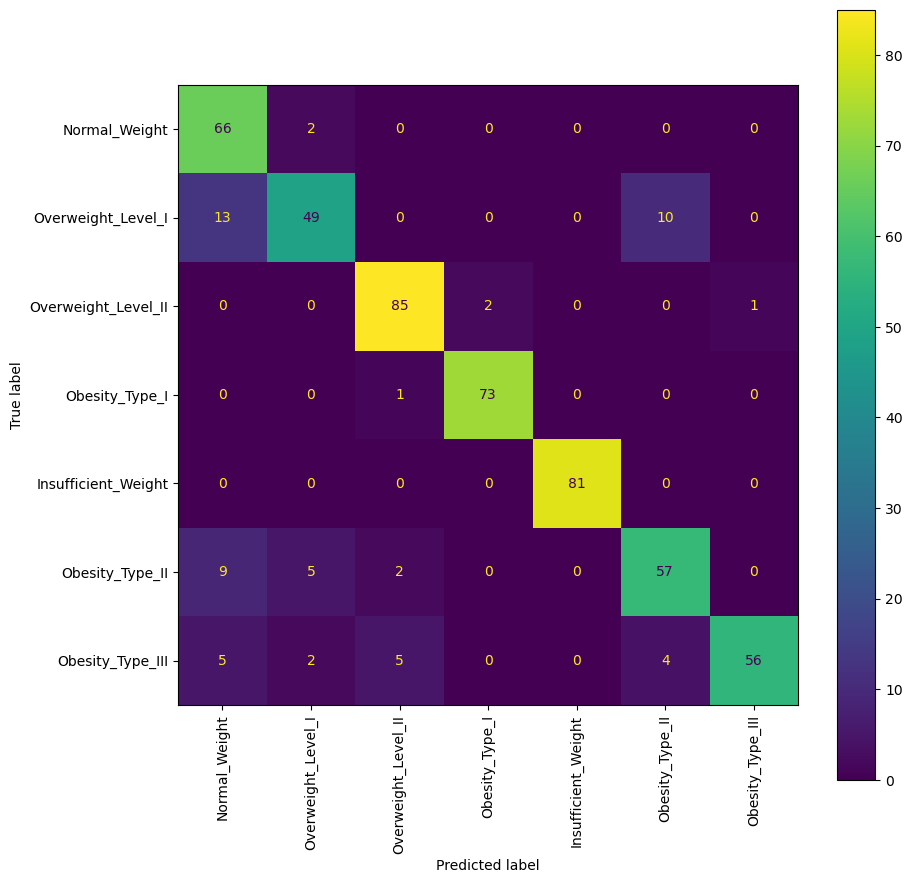

In [ ]:
print(evaluate_model(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1), label)